# Using Pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
## to make it possible to display multiple output inside one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<b>load the data from the vehicles.csv file into pandas data frame

In [3]:
df = pd.read_csv('data/vehicles.csv')

First exploration of the dataset:

- How many observations does it have?
35952
- Look at all the columns: do you understand what they mean?
yes
- Look at the raw data: do you see anything weird?
no
- Look at the data types: are they the expected ones for the information the column contains?
I would except integer for the number of cylinders.
The MPG could be a float, but integer makes sense as well, if the MPG was rounded to the nearest integer. Same for fuel cost per year.


In [4]:
df.info() 
df.head()
#df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


### Cleaning and wrangling data

- Some car brand names refer to the same brand. Replace all brand names that contain the word "Dutton" for simply "Dutton". If you find similar examples, clean their names too. Use `loc` with boolean indexing.

- Convert CO2 Emissions from Grams/Mile to Grams/Km

- Create a binary column that solely indicates if the transmission of a car is automatic or manual. Use `pandas.Series.str.startswith` and (?).

- convert MPG columns to km_per_liter

Note:
<br>Converting Grams/Mile to Grams/Km

1 Mile = 1.60934 Km

Converting Gallons to Liters

1 Gallon = 3.78541 Liters



In [5]:
df[df["Make"].str.contains("Dutton")]

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
11012,"E. P. Dutton, Inc.",Funeral Coach,1985,4.1,8.0,Automatic 4-spd,Front-Wheel Drive,Special Purpose Vehicles,Regular,19.388824,15,21,17,522.764706,1950
30164,S and S Coach Company E.p. Dutton,Funeral Coach 2WD,1984,6.0,8.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,32.961000,9,11,10,888.700000,3350
31754,Superior Coaches Div E.p. Dutton,Funeral Coach 2WD,1984,6.0,8.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,32.961000,10,11,10,888.700000,3350


In [6]:
df.loc[df[df["Make"].str.contains("Dutton")].index,"Make"] = "Dutton"
df[df["Make"].str.contains("Dutton")]

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
11012,Dutton,Funeral Coach,1985,4.1,8.0,Automatic 4-spd,Front-Wheel Drive,Special Purpose Vehicles,Regular,19.388824,15,21,17,522.764706,1950
30164,Dutton,Funeral Coach 2WD,1984,6.0,8.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,32.961000,9,11,10,888.700000,3350
31754,Dutton,Funeral Coach 2WD,1984,6.0,8.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,32.961000,10,11,10,888.700000,3350


In [7]:
#df["Make"].value_counts()
#df.loc[df[df["Make"].str.contains("Test")].index,"Make"] = "BMW"
df.loc[df["Make"].str.contains("Test"),"Make"] = "BMW"
df[df["Make"].str.contains("BMW")]

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
1398,BMW,128ci Convertible,2010,3.0,6.0,Automatic (S6),Rear-Wheel Drive,Subcompact Cars,Premium,15.695714,18,27,21,423.190476,1950
1399,BMW,128ci Convertible,2010,3.0,6.0,Manual 6-spd,Rear-Wheel Drive,Subcompact Cars,Premium,14.982273,18,28,22,403.954545,1850
1400,BMW,128ci Convertible,2011,3.0,6.0,Manual 6-spd,Rear-Wheel Drive,Subcompact Cars,Premium,14.982273,18,28,22,403.954545,1850
1401,BMW,128ci Convertible,2011,3.0,6.0,Automatic (S6),Rear-Wheel Drive,Subcompact Cars,Premium,15.695714,18,27,21,423.190476,1950
1402,BMW,128ci Convertible,2012,3.0,6.0,Automatic (S6),Rear-Wheel Drive,Subcompact Cars,Premium,15.695714,18,27,21,423.190476,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,BMW,i8,2015,1.5,3.0,Automatic 6-spd,All-Wheel Drive,Subcompact Cars,Premium and Electricity,7.356924,28,29,28,198.000000,1450
3074,BMW,i8,2016,1.5,3.0,Automatic 6-spd,All-Wheel Drive,Subcompact Cars,Premium and Electricity,7.356924,28,29,28,198.000000,1450
3075,BMW Alpina,B7,2007,4.4,8.0,Automatic (S6),Rear-Wheel Drive,Large Cars,Premium,20.600625,14,21,16,555.437500,2550
3076,BMW Alpina,B7,2008,4.4,8.0,Automatic (S6),Rear-Wheel Drive,Large Cars,Premium,20.600625,14,21,16,555.437500,2550


In [8]:
# convert g/mile to g/km (1 mile = 1.60934 km), x (g/mile)/(1.60934 km/mile) =  x/1.60934 g/km
lst_g_per_mile = list(df["CO2 Emission Grams/Mile"])
lst_g_per_km = [item/1.60934 for item in lst_g_per_mile]
df.insert(len(df.columns)-1, "CO2 Emission Grams/Km", lst_g_per_km)
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,CO2 Emission Grams/Km,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,324.831736,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,424.779962,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,345.133719,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,424.779962,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,345.133719,2550


In [9]:
# Create a binary column that solely indicates if the transmission of a car is automatic or manual. 
# Use pandas.Series.str.startswith and (?).
df.insert(list(df.columns).index("Transmission")+1, "Type of Transmission", 
          df.Transmission.apply(lambda df: "Automatic" if df.startswith("Auto") else "Manual"))
df

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Type of Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,CO2 Emission Grams/Km,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,Automatic,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,324.831736,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,Automatic,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,424.779962,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Automatic,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,345.133719,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Automatic,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,424.779962,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Automatic,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,345.133719,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Automatic,Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,151.614948,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Automatic,Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,150.993575,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Automatic,Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,151.614948,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Automatic,Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,152.857693,1100


In [10]:
# convert MPG (miles per gallon) columns to km_per_liter (1 mile = 1.60934 km, 1 gallon = 3.78541 liters)
# mpg = mile/gallon
# kpl = km/liter
# x mile/gallon * (1.60934(km/mile) / 3.78541(liter/gallon)) = x * 1.60934/3.78541 km/liter
col_lst = ["City MPG", "Highway MPG", "Combined MPG"]

for col in col_lst:
    df.insert(list(df.columns).index(col)+1, col.split()[0]+" KPL", 
        df[col].apply(lambda df: round(df*1.60934/3.78541)))
    # if you want to delete the initial MPG column(s) you can do it here
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Type of Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,City KPL,Highway MPG,Highway KPL,Combined MPG,Combined KPL,CO2 Emission Grams/Mile,CO2 Emission Grams/Km,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,Automatic,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,8,17,7,17,7,522.764706,324.831736,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,Automatic,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,6,13,6,13,6,683.615385,424.779962,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Automatic,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,7,17,7,16,7,555.437500,345.133719,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Automatic,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,6,13,6,13,6,683.615385,424.779962,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Automatic,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,6,21,9,16,7,555.437500,345.133719,2550


### Gathering insights:

- What's the car that consumes the least/most fuel?

In [11]:
# How many car makers are there? 
len(list(df.Make.value_counts()))

125

In [12]:
# How many models are there?
len(list(df.Model.value_counts()))

3608

In [13]:
# Which car maker has the most cars in the dataset?
df.Make.value_counts().index[0]

'Chevrolet'

In [14]:
# When were these cars made?
print(df.Year.min(),"...",df.Year.max())

1984 ... 2017


In [15]:
# How big is the engine of these cars?
print(df["Engine Displacement"].min(),"...",df["Engine Displacement"].max())

0.6 ... 8.4


<AxesSubplot:>

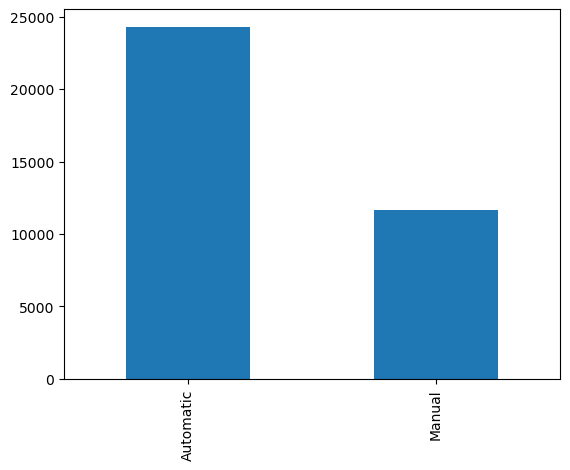

In [16]:
# What's the frequency of different transmissions?
fig, ax = plt.subplots()
df['Type of Transmission'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

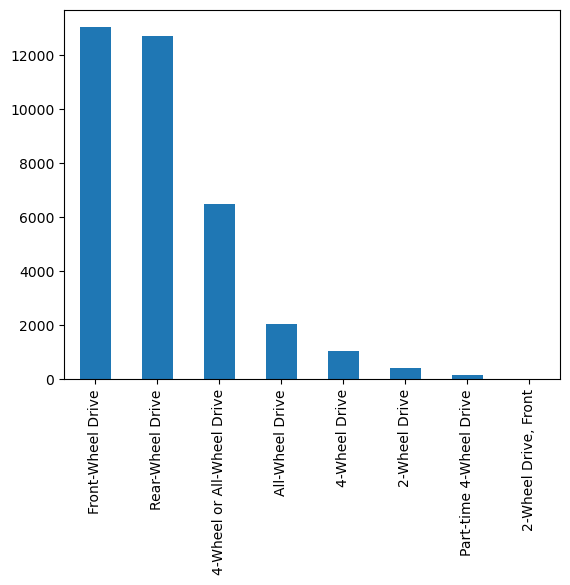

In [17]:
# What's the frequency of different drivetrains?
fig, ax = plt.subplots()
df['Drivetrain'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

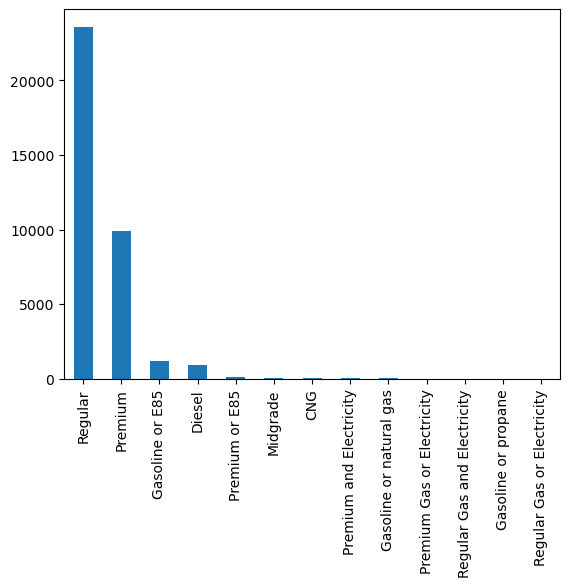

In [18]:
# What's the frequency of different fuel types?
fig, ax = plt.subplots()
df['Fuel Type'].value_counts().plot(ax=ax, kind='bar')

<b> (Optional)

What brand has the worst CO2 Emissions on average?

Hint: use the function `sort_values()`

In [19]:
import operator

In [20]:
df_make_sorted = sorted(list(set(df.Make)))                           
em_means_make = [df[df.Make==make]["CO2 Emission Grams/Km"].mean() for make in df_make_sorted]
make_em_zip = list(zip(df_make_sorted, em_means_make))
make_em_zip_sorted = sorted(make_em_zip, key=operator.itemgetter(1))
worst_em_brand = make_em_zip_sorted[-1][0]
print("The brand with the worst CO2 emission is",worst_em_brand,".")

The brand with the worst CO2 emission is Vector .


Do cars with automatic transmission consume more fuel than cars with manual transmission on average?

In [27]:
df_transm_sorted = list(set(df["Type of Transmission"]))
em_means_transm = [round(df[df["Type of Transmission"]==transm]["Combined KPL"].mean(),1) for transm in df_transm_sorted]
transm_em_zip = list(zip(df_transm_sorted, em_means_transm))
transm_em_zip_sorted = sorted(transm_em_zip, key=operator.itemgetter(1))
most_fuel_transm = transm_em_zip_sorted[-1][0]
print("Cars with",most_fuel_transm,"consume more fuel than cars with",transm_em_zip_sorted[0][0],"transmission.")
transm_em_zip_sorted

Cars with Manual consume more fuel than cars with Automatic transmission.


[('Automatic', 8.3), ('Manual', 9.0)]

In [22]:
list(df.columns)

['Make',
 'Model',
 'Year',
 'Engine Displacement',
 'Cylinders',
 'Transmission',
 'Type of Transmission',
 'Drivetrain',
 'Vehicle Class',
 'Fuel Type',
 'Fuel Barrels/Year',
 'City MPG',
 'City KPL',
 'Highway MPG',
 'Highway KPL',
 'Combined MPG',
 'Combined KPL',
 'CO2 Emission Grams/Mile',
 'CO2 Emission Grams/Km',
 'Fuel Cost/Year']